# Introduction

Here I want to compute the n-cover times. For my taxi-trip process, as well as the random walk. For N = 1, i expect the random walk to win. I'm hoping that for n > 2, the taxi-trip will do better.

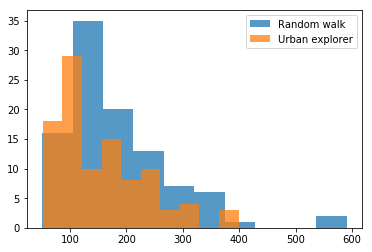

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

num_nodes_per_side = 5
G = nx.grid_2d_graph(num_nodes_per_side,num_nodes_per_side)
G = nx.convert_node_labels_to_integers(G)

num_trials, n = 100, 1
Ts_rw = f.random_walk_covertime(G,n,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,n,num_trials=num_trials)
plt.hist(Ts_rw, alpha=0.75);plt.hist(Ts_ue,alpha=0.75);plt.legend(['Random walk','Urban explorer'])

#np.savetxt('data/covertimes_2dlattice_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_2dlattice_random_walker.txt',Ts_rw)

Very similar here

## Scaling with N

finished N = 1
finished N = 2
finished N = 3
finished N = 4
finished N = 5
finished N = 6
finished N = 7
finished N = 8
finished N = 9
finished N = 10
finished N = 11
finished N = 12
finished N = 13
finished N = 14
finished N = 15
finished N = 16
finished N = 17
finished N = 18
finished N = 19


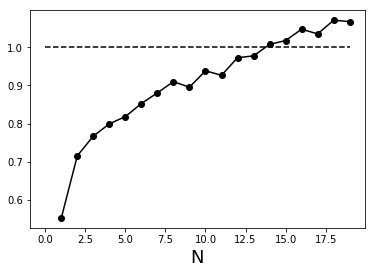

In [8]:
meanTratios = []
varTratios = []
Ns = range(1,21,1)
m = 1
for N in Ns:
    num_trials = 2000
    G = nx.grid_2d_graph(N,num_nodes_per_side)
    G = nx.convert_node_labels_to_integers(G)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    #varTratios.append(np.std(Ts_ue) / np.std(Ts_rw) ) 
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

np.savetxt('data/mean_covertime_ratio_2dlattice.txt',meanTratios)
np.savetxt('data/mean_covertime_ratio_2dlattice_Ns.txt',Ns)

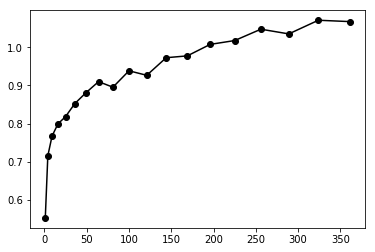

In [11]:
plt.plot(np.array(Ns)**2,meanTratios,'ko-')

Interesting: the random walk wins for larger graph sizes. 

### Startionary densities

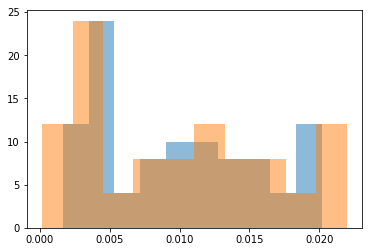

In [60]:
#Make graph
num_nodes_per_side = 10
G = nx.grid_2d_graph(num_nodes_per_side,num_nodes_per_side)
G = nx.convert_node_labels_to_integers(G)

#Run U.E.
N = G.number_of_nodes()
counts = np.zeros(N)
T = 5*10**7
counts = f.urban_explorer_stationary_densities(G,counts,T)
counts = counts / sum(counts)

#Find betweenness
bs = nx.betweenness_centrality(G).values()
bs = np.array(bs) / sum(bs)

#Find degree
ds = np.array([d for n, d in G.degree()])
ds = ds / (1.0*sum(ds))

plt.hist(counts,alpha=0.5)
plt.hist(bs,alpha=0.5)

np.savetxt('data/bs_2dlattice.txt',bs)
np.savetxt('data/ps_2dlattice.txt',counts)

(array([ 4.,  8.,  8., 16.,  0.,  4.,  0.,  8.,  0.,  8.,  8.,  4.,  0.,
         8.,  8.,  0.,  4.,  0.,  8.,  4.]),
 array([0.00015814, 0.00124864, 0.00233914, 0.00342964, 0.00452014,
        0.00561065, 0.00670115, 0.00779165, 0.00888215, 0.00997265,
        0.01106315, 0.01215365, 0.01324416, 0.01433466, 0.01542516,
        0.01651566, 0.01760616, 0.01869666, 0.01978717, 0.02087767,
        0.02196817]),
 <a list of 20 Patch objects>)

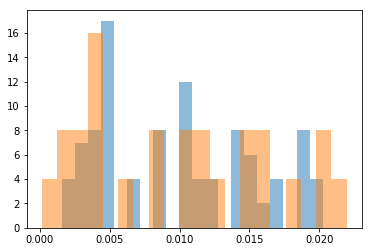

In [48]:
B = 20
plt.hist(counts,alpha=0.5,bins=B)
plt.hist(bs,alpha=0.5,bins=B)

Text(0,0.5,'$p_i$')

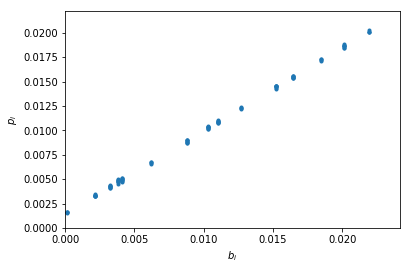

In [54]:
plt.plot(bs,counts,'.')
plt.xlim([0,1.1*max(bs)])
plt.ylim([0,1.1*max(counts)])
plt.xlabel('$b_i$')
plt.ylabel('$p_i$')

Text(0,0.5,'$p_i$')

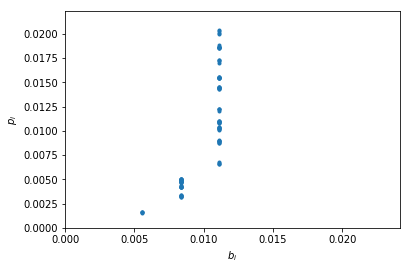

In [56]:
plt.plot(ds,counts,'.')
plt.xlim([0,1.1*max(bs)])
plt.ylim([0,1.1*max(counts)])
plt.xlabel('$b_i$')
plt.ylabel('$p_i$')

### Alternate definition of betweenness

In [ ]:
meanTs = []
varTs = []
#Ns = [10] + range(50,501,50)
Ns = range(1,21)

m = 1
for N in Ns:
    num_trials = 500
    num_nodes_per_side = N
    G = nx.grid_2d_graph(num_nodes_per_side,num_nodes_per_side)
    G = nx.convert_node_labels_to_integers(G)    
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTs.append(np.mean(Ts_ue))
    varTs.append(np.std(Ts_ue)) 
    print 'finished N = ' + str(N)
    
    
from scipy.optimize import curve_fit
Ns = np.array(Ns)**2
def func(N,b,c):
    return b*N**c
popt, pcov = curve_fit(func,Ns,meanTs)
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.errorbar(Ns,meanTs,yerr=varTs,fmt='o')

popt
#np.savetxt('data/mean_cover_td_2Dgraph.txt',meanTs)
#np.savetxt('data/mean_cover_td_2Dgraph_Ns.txt',Ns)

finished N = 1
finished N = 2
finished N = 3
finished N = 4
finished N = 5
finished N = 6
finished N = 7
finished N = 8
finished N = 9
finished N = 10
finished N = 11
finished N = 12


### Redo scaling

In [ ]:
td, rw = [], []
Ns = range(1,21,1)
m = 1
for N in Ns:
    num_trials = 1000
    G = nx.grid_2d_graph(N,N)
    G = nx.convert_node_labels_to_integers(G)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    rw.append(np.mean(Ts_rw))
    td.append(np.mean(Ts_ue))
    print 'finished N = ' + str(N)
plt.plot(Ns,td,'o-')
plt.plot(Ns,rw,'o-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

#np.savetxt('data/mean_covertime_ratio_2dlattice.txt',meanTratios)
#np.savetxt('data/mean_covertime_ratio_2dlattice_Ns.txt',Ns)

finished N = 1
finished N = 2
finished N = 3
finished N = 4
finished N = 5
finished N = 6
finished N = 7
finished N = 8
finished N = 9
finished N = 10
finished N = 11
finished N = 12


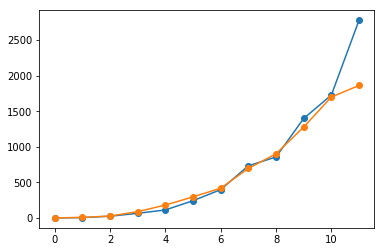

In [9]:
plt.plot(td,'o-')
plt.plot(rw,'o-')